# Dikemodel continued - subspace partitioning

Scenario discovery.... (nog uitleg toevoegen)

## 1. Apply scenario discovery

**1.** Import model from Open Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

**2.** Import results from Open Exploration

bla bla importeren en levers weghalen



In [3]:
# HIER GING DUS WSS IETS FOUT !

# from ema_workbench import load_results
#
# # Laad de resultaten
# results = load_results('dike_open_exploration_results.tar.gz')
# #results = load_results('dike_open_exploration_results_pf2.tar.gz')
# experiments, outcomes = results
#
# columns_to_drop = [
#     '0_RfR 0', '0_RfR 1', '0_RfR 2',
#     '1_RfR 0', '1_RfR 1', '1_RfR 2',
#     '2_RfR 0', '2_RfR 1', '2_RfR 2',
#     '3_RfR 0', '3_RfR 1', '3_RfR 2',
#     '4_RfR 0', '4_RfR 1', '4_RfR 2',
#     'EWS_DaysToThreat',
#     'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
#     'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
#     'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
#     'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
#     'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
#     'scenario', 'policy', 'model'
# ]
#
# cleaned_experiments = experiments.drop(columns=columns_to_drop)

In [4]:
from ema_workbench import load_results

# Laad de resultaten
results = load_results('dike_open_exploration_results.tar.gz')
experiments, outcomes = results

# Kolommen die NIET relevant zijn voor scenario discovery m.b.t. RfR, en dus worden verwijderd
columns_to_drop = [
    'EWS_DaysToThreat',  # Early Warning System (voor deze analyse buiten scope)
    # Dijkverhogingsmaatregelen per segment — voor nu buiten beschouwing
    'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
    'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
    'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
    'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
    'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
    # Metadata
    'scenario', 'policy', 'model'
]

# Maak een nieuw dataframe met alleen relevante onzekerheden en RfR-beleidsvariabelen
cleaned_experiments = experiments.drop(columns=columns_to_drop)


In [5]:
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2
0,32,131.735681,10.0,0.950442,134.981422,10.0,0.013068,131.611111,1.5,0.380820,...,0,0,0,0,0,0,1,1,0,1
1,78,122.864680,1.0,0.305156,33.018178,1.0,0.262408,226.073596,1.0,0.877744,...,0,0,0,0,0,0,1,1,0,1
2,112,167.216005,1.5,0.903056,222.107000,1.0,0.466091,60.064298,1.0,0.853033,...,0,0,0,0,0,0,1,1,0,1
3,48,341.424198,1.0,0.470121,214.499865,10.0,0.616944,259.688325,10.0,0.373349,...,0,0,0,0,0,0,1,1,0,1
4,23,100.134407,1.0,0.587956,71.495756,1.5,0.166079,210.500495,1.5,0.464822,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,70,65.523871,10.0,0.439421,71.972463,1.5,0.004934,341.468171,1.0,0.828136,...,0,0,1,1,0,0,1,0,1,0
27496,105,157.637432,1.5,0.272164,271.175070,1.0,0.744402,207.122113,1.0,0.495700,...,0,0,1,1,0,0,1,0,1,0
27497,13,253.266277,1.5,0.296252,184.519363,10.0,0.851636,237.984516,10.0,0.338477,...,0,0,1,1,0,0,1,0,1,0
27498,115,242.998128,10.0,0.175503,44.651677,10.0,0.725254,97.319819,1.5,0.753677,...,0,0,1,1,0,0,1,0,1,0


**3.** Apply scenario discovery


### 1. RFR Total Cost

'RfR Total Costs': 12200 van 27500 scenario's voldoen aan de drempel.


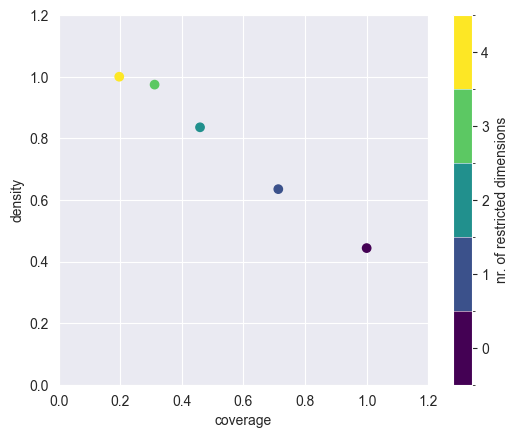

In [6]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

# Binaire classificatie aanmaken
threshold_rfr = 1000000000
y_rfr = outcomes['RfR Total Costs'] <= threshold_rfr

# Controleer of er voldoende positieve gevallen zijn
if y_rfr.sum() < 10:
    raise ValueError(f"Te weinig positieve classificaties ({y_rfr.sum()}) onder de drempel van {threshold_rfr} voor 'RfR Total Costs'.")

# PRIM uitvoeren
x_rfr = cleaned_experiments.copy()
prim_alg_rfr = prim.Prim(x_rfr, y_rfr, threshold=0.8)
box_rfr = prim_alg_rfr.find_box()

# Resultaten tonen
print(f"'RfR Total Costs': {y_rfr.sum()} van {len(y_rfr)} scenario's voldoen aan de drempel.")
box_rfr.show_tradeoff()
#box_rfr.show_box()
plt.show()

coverage       0.196721
density        1.000000
id             4.000000
k           2400.000000
mass           0.087273
mean           1.000000
n           2400.000000
res_dim        4.000000
Name: 4, dtype: float64

        box 4                             
          min  max qp value       qp value
1_RfR 2   0.0  0.0      NaN  5.614589e-120
1_RfR 1   0.0  0.0      NaN  4.545227e-100
4_RfR 1   0.0  0.0      NaN   3.440747e-54
4_RfR 0   0.0  0.0      NaN   8.425099e-28



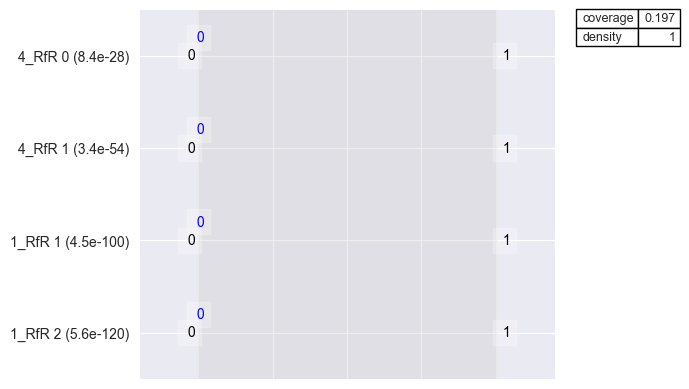

In [7]:
box_rfr.inspect()
box_rfr.inspect(style='graph')
plt.show()

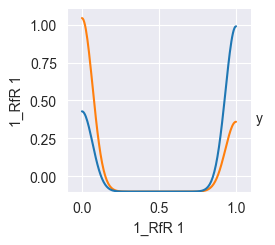

In [8]:
box_rfr.show_pairs_scatter(1)
plt.show()

In [9]:
print(len(box_rfr.box_lims[0].keys()))
print(list(box_rfr.box_lims[0].keys()))

34
['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2']


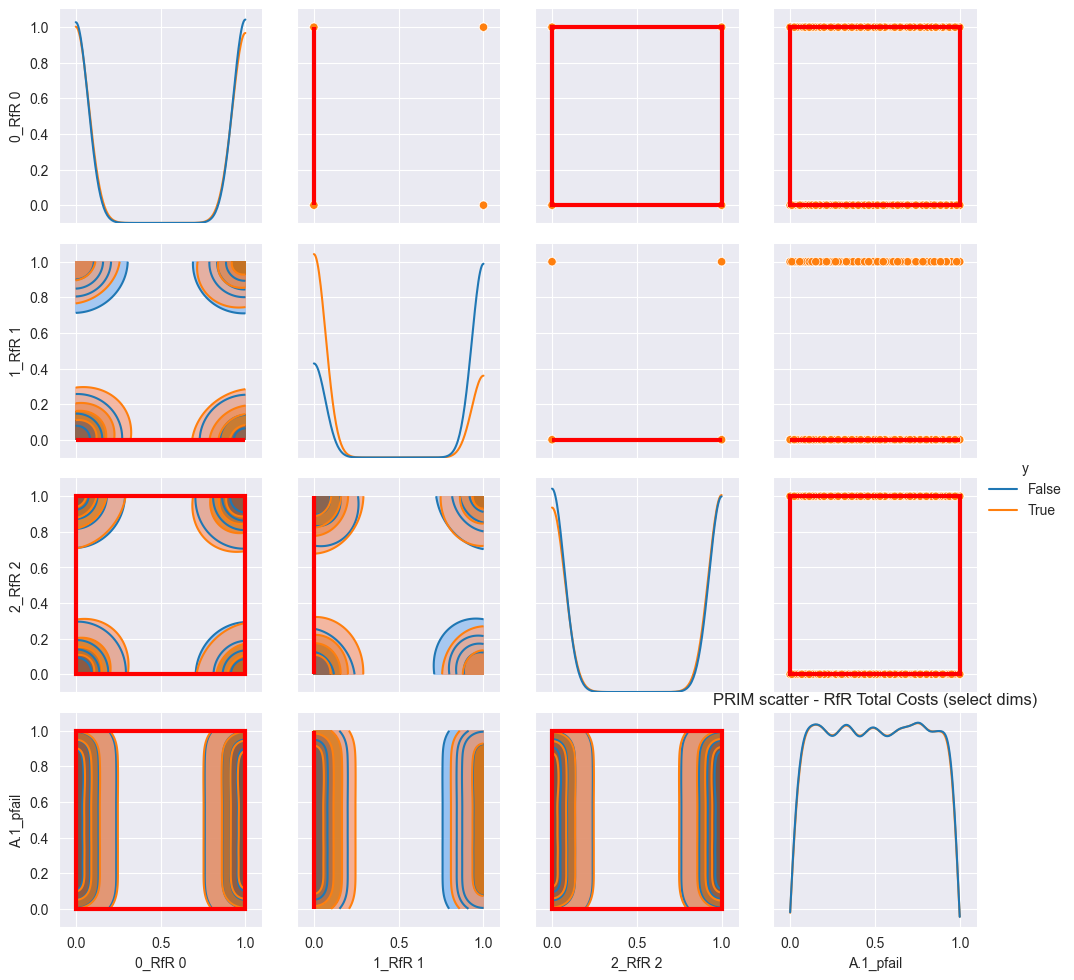

In [10]:
dims_rfr = ['0_RfR 0', '1_RfR 1', '2_RfR 2', 'A.1_pfail']  # voorbeeldmix
box_rfr.show_pairs_scatter(dims=dims_rfr)
plt.title("PRIM scatter - RfR Total Costs (select dims)")
plt.show()

### 2. Expected Annual Damage

'Expected Annual Damage': 18779 van 27500 scenario's voldoen aan de drempel.


/Users/evalievanoijen/Downloads/EPA133a-Lab/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/evalievanoijen/Downloads/EPA133a-Lab/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


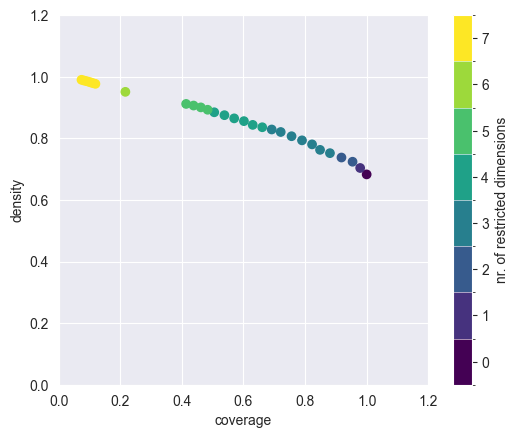

In [11]:
# Binaire classificatie aanmaken
threshold_ead = 5000000
y_ead = outcomes['Expected Annual Damage'] <= threshold_ead

# Controle op voldoende positieve gevallen
if y_ead.sum() < 10:
    raise ValueError(f"Te weinig positieve classificaties ({y_ead.sum()}) onder de drempel van {threshold_ead} voor 'Expected Annual Damage'.")

# PRIM uitvoeren
x_ead = cleaned_experiments.copy()
prim_alg_ead = prim.Prim(x_ead, y_ead, threshold=0.8)
box_ead = prim_alg_ead.find_box()

# Resultaten tonen
print(f"'Expected Annual Damage': {y_ead.sum()} van {len(y_ead)} scenario's voldoen aan de drempel.")
box_ead.show_tradeoff()
#box_ead.show_box()
plt.show()


coverage       0.074125
density        0.990043
id            28.000000
k           1392.000000
mass           0.051127
mean           0.990043
n           1406.000000
res_dim        7.000000
Name: 28, dtype: float64

              box 28                                    
                 min         max      qp value  qp value
4_RfR 1     0.000000    0.000000           NaN  0.000006
A.2_Bmax   33.018178  333.734826           NaN  0.570438
A.2_pfail   0.618017    0.994465  1.808259e-64       NaN
A.3_pfail   0.390086    0.991478  2.106268e-43       NaN
2_RfR 1     1.000000    1.000000  3.982430e-18       NaN
A.1_pfail   0.138845    0.998580  8.764380e-03       NaN
A.1_Bmax   51.210449  348.204025  3.525733e-01       NaN



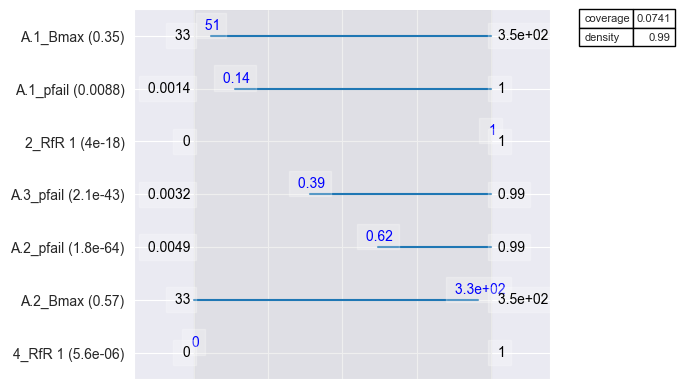

In [12]:
box_ead.inspect()
box_ead.inspect(style='graph')
plt.show()

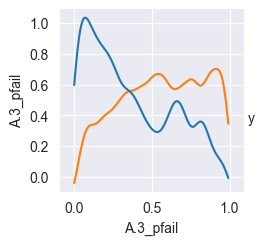

In [13]:
box_ead.show_pairs_scatter(1)
plt.show()

In [14]:
print(len(box_ead.box_lims[0].keys()))
print(list(box_ead.box_lims[0].keys()))

34
['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2']


In [ ]:
# Selecteer handmatig een subset (bijv. 2 onzekerheden en 2 beleidshefbomen)
dims = ['A.1_pfail', 'A.2_pfail', '1_RfR 0', '2_RfR 1']

box_ead.show_pairs_scatter(dims=dims)
plt.title("PRIM scatter - Expected Annual Damage (select dims)")
plt.show()

In [14]:
# dims = list(box_ead.box_lims[0].keys())
# box_ead.show_pairs_scatter(dims=dims)
# plt.title("PRIM scatter - Expected Annual Damage (restricted dims)")
# plt.show()

### 3. 'Dike Investment Costs'

'Dike Investment Costs': 21900 van 27500 scenario's voldoen aan de drempel van 600000000.


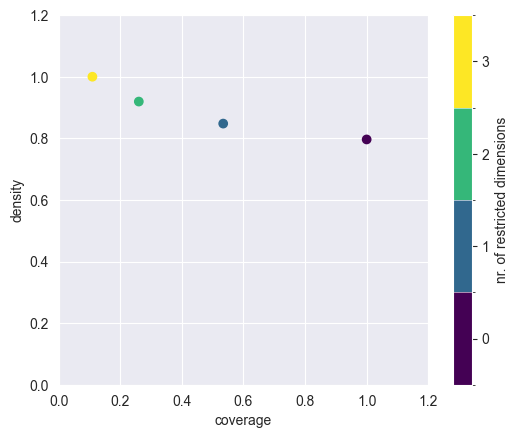

In [15]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

# Selecteer de relevante outcome-data
data_dike_inv = outcomes['Dike Investment Costs']

# Stel een binaire classificatie op voor lage investeringskosten
threshold_dike_inv = 600_000_000
y_dike_inv = (data_dike_inv <= threshold_dike_inv).astype(bool)

# Controleer of er voldoende positieve gevallen zijn
if y_dike_inv.sum() < 10:
    raise ValueError(f"Te weinig positieve classificaties ({y_dike_inv.sum()}) onder de drempel van {threshold_dike_inv} voor 'Dike Investment Costs'.")

# PRIM uitvoeren
x_dike_inv = cleaned_experiments.copy()
prim_alg_dike_inv = prim.Prim(x_dike_inv, y_dike_inv, threshold=0.8)
box_dike_inv = prim_alg_dike_inv.find_box()

# Resultaten tonen
print(f"'Dike Investment Costs': {y_dike_inv.sum()} van {len(y_dike_inv)} scenario's voldoen aan de drempel van {threshold_dike_inv}.")
box_dike_inv.show_tradeoff()
#box_dike_inv.show_box()
plt.show()


coverage       0.109589
density        1.000000
id             3.000000
k           2400.000000
mass           0.087273
mean           1.000000
n           2400.000000
res_dim        3.000000
Name: 3, dtype: float64

        box 3                             
          min  max       qp value qp value
4_RfR 0   1.0  1.0  6.449587e-179      NaN
3_RfR 0   1.0  1.0  5.926141e-126      NaN
0_RfR 0   1.0  1.0   2.288752e-88      NaN



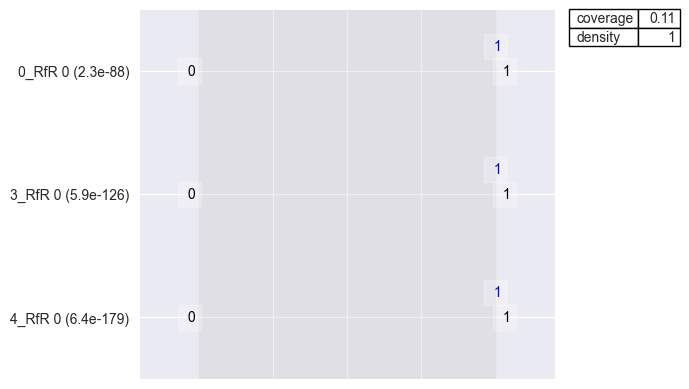

In [16]:
box_dike_inv.inspect()
box_dike_inv.inspect(style='graph')
plt.show()

In [17]:
# dims = list(box_dike_inv.box_lims[0].keys())
# box_dike_inv.show_pairs_scatter(dims=dims)
# plt.title("")
# plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x11959ccc0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1397d4360> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
print(len(box_dike_invd.box_lims[0].keys()))
print(list(box_dike_inv.box_lims[0].keys()))

In [ ]:
dims_dike = ['A.2_Bmax', 'A.3_Brate', 'A.3_pfail', 'discount rate 1']
box_dike_inv.show_pairs_scatter(dims=dims_dike)
plt.title("PRIM scatter - Dike Investment Costs (select dims)")
plt.show()

# 2. Visualize the results using Dimensional Stacking


In [49]:
from ema_workbench.analysis import dimensional_stacking
import matplotlib.pyplot as plt

### 1. Dimensional stacking voor 'RfR Total Costs

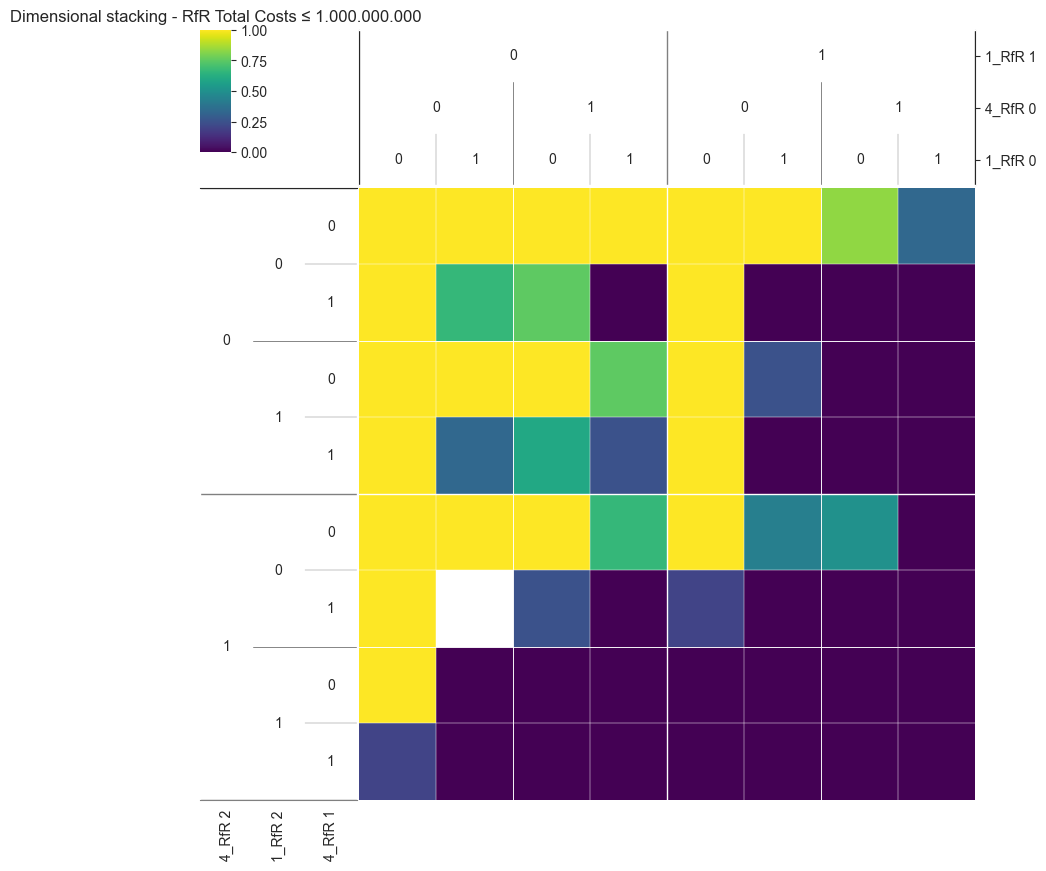

In [50]:
dimensional_stacking.create_pivot_plot(experiments, y_rfr)
plt.title("Dimensional stacking - RfR Total Costs ≤ 1.000.000.000")
plt.show()

### 2. Dimensional stacking voor 'Expected Annual Damage'


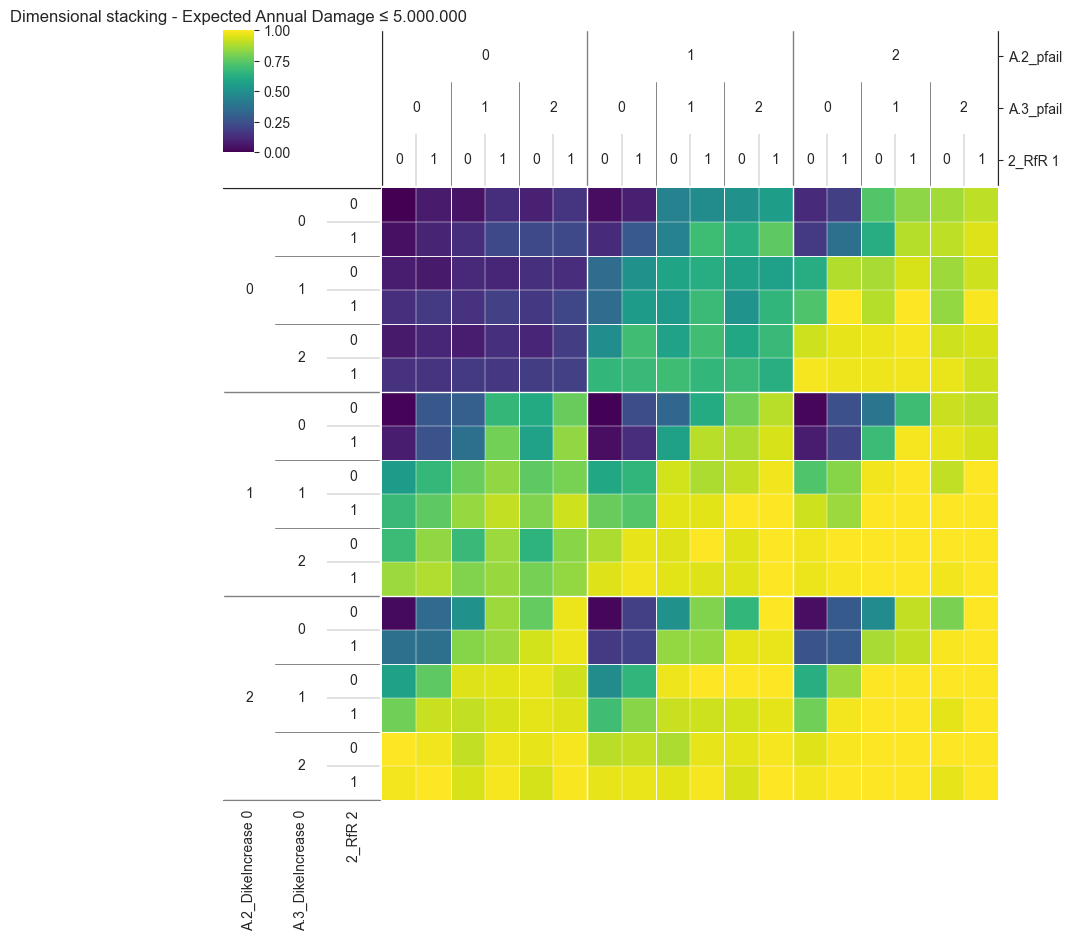

In [48]:
dimensional_stacking.create_pivot_plot(experiments, y_ead)
plt.title("Dimensional stacking - Expected Annual Damage ≤ 5.000.000")
plt.show()

### 3. Dimensional stacking voor 'Dike Investment Costs'

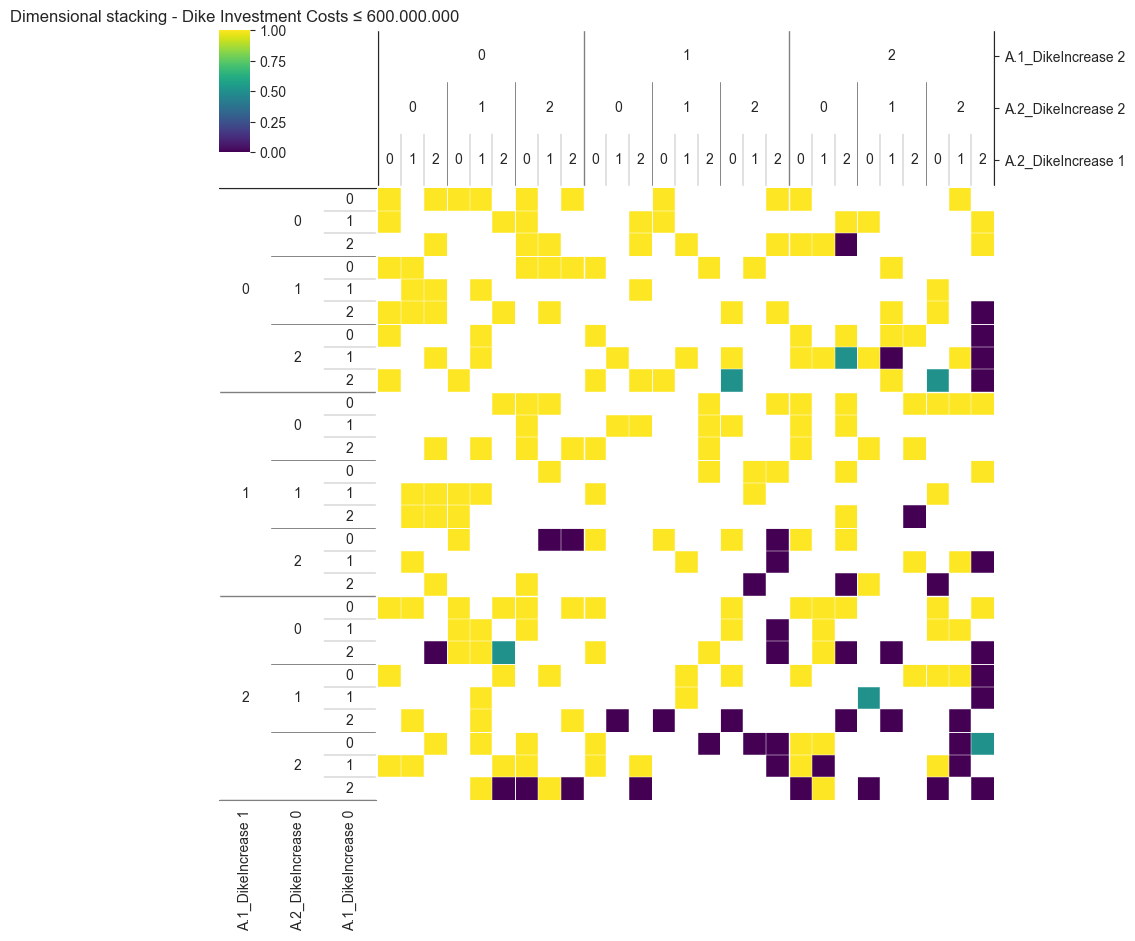

In [51]:
dimensional_stacking.create_pivot_plot(experiments, y_dike_inv)
plt.title("Dimensional stacking - Dike Investment Costs ≤ 600.000.000")
plt.show()

# OUD

In [ ]:
# from ema_workbench.analysis import prim
# import numpy as np
#
# # Stel een vulnerability-condition in op basis van een relevante outcome
# data_rfrtotalcost = outcomes['RfR Total Costs']
# #y_rfrtotalcost = data_rfrtotalcost > np.percentile(data_rfrtotalcost, 90)
# #y_rfrtotalcost = (data_rfrtotalcost  <= 1000000000).astype(bool)
# y_rfrtotalcost = ((data_rfrtotalcost >= 1000000000) & (data_rfrtotalcost <= 1400000000)).astype(bool)
#
# plt.hist(data_rfrtotalcost)
# # PRIM-analyse
# #prim_alg = prim.Prim(cleaned_experiments, y, threshold=0.8, mode='BINARY')  # expliciet maken
#
# prim_alg_rfrtotalcost = prim.Prim(cleaned_experiments, y_rfrtotalcost, threshold=0.8)
# box_rfrtotalcost = prim_alg_rfrtotalcost.find_box()
# box_rfrtotalcost.show_tradeoff()
# plt.show()

In [10]:
# box_rfrtotalcost.inspect()
#box_rfrtotalcost.inspect(style='graph')
#plt.show()

In [11]:
# x = cleaned_experiments.reset_index(drop=True)
# # Boolean array van experimenten in de box
# in_box_rfrtotalcost = box_rfrtotalcost.yi  # Deze is altijd even lang als x na reset_index
#
# # Selecteer de experimenten die in de box vallen
# experiments_in_box_rfrtotalcost = x.loc[in_box_rfrtotalcost]
#
# # Unieke policies selecteren
# robust_policies_rfrtotalcost = experiments_in_box_rfrtotalcost['policy'].unique()
#
# # Robuuste policies opzoeken in originele experimenten
# robust_policies_df_rfrtotalcost = experiments[experiments['policy'].isin(robust_policies_rfrtotalcost)].drop_duplicates(subset='policy')
#
# # Toon resultaat
# print("Robust Policies for RfR Total Costs:")
# display(robust_policies_df_rfrtotalcost)


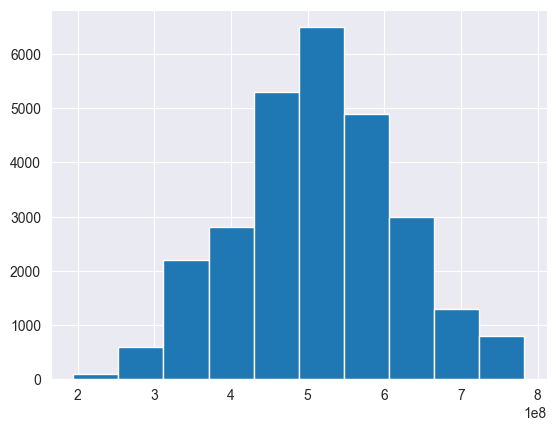

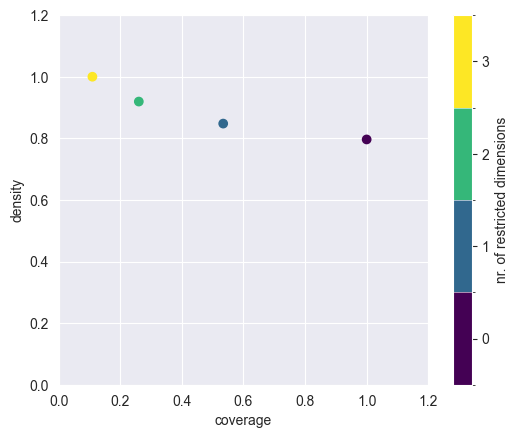

In [12]:
# Stel een vulnerability-condition in op basis van een relevante outcome
data_dike_inv = outcomes['Dike Investment Costs']
# y = data > np.percentile(data, 90)
# y_dike_inv = (y_dike_inv <= 369700000).astype(bool)
#y_dike_inv = (y_dike_inv <= 100000000).astype(bool)
y_dike_inv = (data_dike_inv <= 600000000).astype(bool)
#y = (data < np.percentile(data, 10)).astype(int)  # of .astype(bool)
plt.hist(data_dike_inv)

# PRIM-analyse
#prim_alg = prim.Prim(cleaned_experiments, y, threshold=0.8, mode='BINARY')  # expliciet maken

prim_alg_dike_inv = prim.Prim(cleaned_experiments, y_dike_inv, threshold=0.8)
box_dike_inv = prim_alg_dike_inv.find_box()
box_dike_inv.show_tradeoff()
plt.show()

coverage       0.109589
density        1.000000
id             3.000000
k           2400.000000
mass           0.087273
mean           1.000000
n           2400.000000
res_dim        3.000000
Name: 3, dtype: float64

        box 3                             
          min  max       qp value qp value
4_RfR 0   1.0  1.0  6.449587e-179      NaN
3_RfR 0   1.0  1.0  5.926141e-126      NaN
0_RfR 0   1.0  1.0   2.288752e-88      NaN



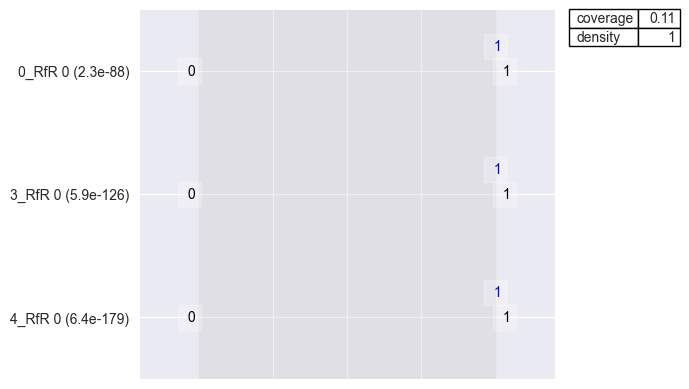

In [13]:
box_dike_inv.inspect()
box_dike_inv.inspect(style='graph')
plt.show()

In [14]:
# x = cleaned_experiments.reset_index(drop=True)
# # Boolean array van experimenten in de box
# in_box_dike_inv = box_dike_inv.yi  # Deze is altijd even lang als x na reset_index
#
# # Selecteer de experimenten die in de box vallen
# experiments_in_box_dike_inv = x.loc[in_box_dike_inv]
#
# # Unieke policies selecteren
# robust_policies_dike_inv = experiments_in_box_dike_inv['policy'].unique()
#
# # Robuuste policies opzoeken in originele experimenten
# robust_policies_df_dike_inv = experiments[experiments['policy'].isin(robust_policies_dike_inv)].drop_duplicates(subset='policy')
#
# # Toon resultaat
# print("Robust Policies for Dike Investment Costs:")
# display(robust_policies_df_dike_inv)

/Users/evalievanoijen/Downloads/EPA133a-Lab/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/evalievanoijen/Downloads/EPA133a-Lab/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


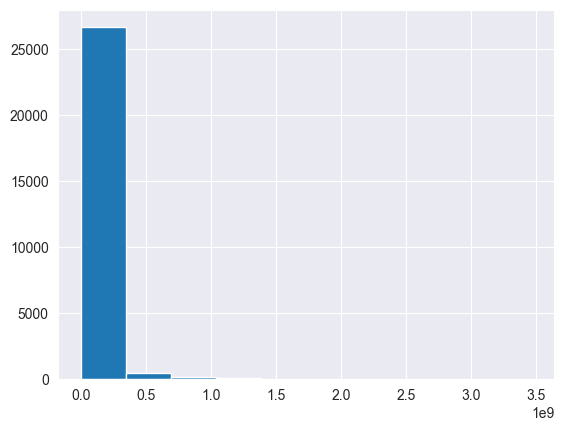

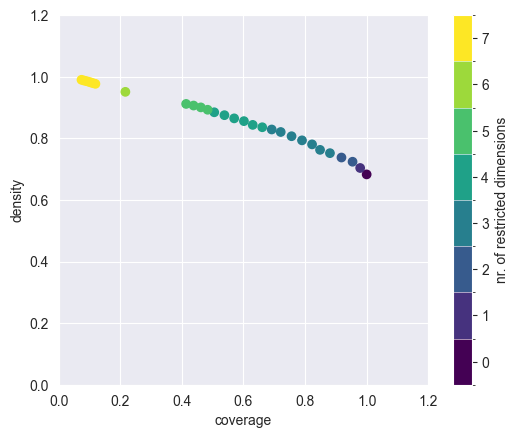

In [15]:
# Stel een vulnerability-condition in op basis van een relevante outcome
data_expanndamage = outcomes['Expected Annual Damage']
# y = data > np.percentile(data, 90)
# y_expanndamage = (data_expanndamage <= 369700000).astype(bool)
#y_expanndamage = (data_expanndamage <= 100000000).astype(bool)
y_expanndamage = (data_expanndamage <= 5000000).astype(bool)
#y = (data < np.percentile(data, 10)).astype(int)  # of .astype(bool)
plt.hist(data_expanndamage)

# PRIM-analyse
#prim_alg = prim.Prim(cleaned_experiments, y, threshold=0.8, mode='BINARY')  # expliciet maken

prim_alg_expanndamage = prim.Prim(cleaned_experiments, y_expanndamage, threshold=0.8)
box_expanndamage = prim_alg_expanndamage.find_box()
box_expanndamage.show_tradeoff()
plt.show()

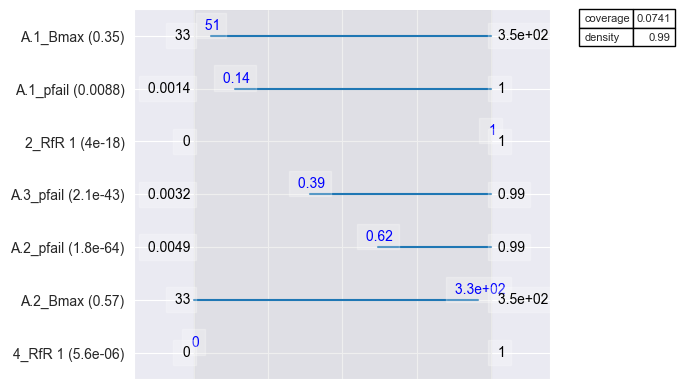

In [16]:
# box_expanndamage.inspect()
box_expanndamage.inspect(style='graph')
plt.show()

In [17]:
# x = cleaned_experiments.reset_index(drop=True)
# # Boolean array van experimenten in de box
# in_box_expanndamage = box_expanndamage.yi  # Deze is altijd even lang als x na reset_index
#
# # Selecteer de experimenten die in de box vallen
# experiments_in_box_expanndamage = x.loc[in_box_expanndamage]
#
# # Unieke policies selecteren
# robust_policies_expanndamage = experiments_in_box_expanndamage['policy'].unique()
#
# # Robuuste policies opzoeken in originele experimenten
# robust_policies_df_expanndamage = experiments[experiments['policy'].isin(robust_policies_expanndamage)].drop_duplicates(subset='policy')
#
# # Toon resultaat
# print("Robust Policies for Expected annual damage:")
# display(robust_policies_df_expanndamage)

In [18]:
# Maak een samengestelde outcome "All Costs" aan door de drie relevante outcomes op te tellen
# Zorg ervoor dat deze keys bestaan in je outcomes dictionary
all_costs = (
    outcomes["RfR Total Costs"] +
    outcomes["Dike Investment Costs"] +
    outcomes["Expected Annual Damage"]
)

# Voeg "All Costs" toe aan de outcomes dictionary voor verdere analyse
outcomes["All Costs"] = all_costs


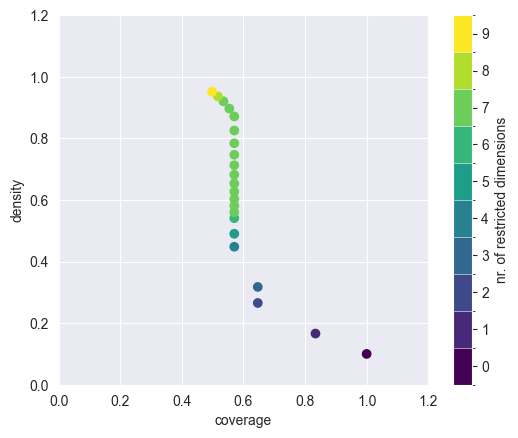

In [19]:
from ema_workbench.analysis import prim
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Vermijd Pandas dtype warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Stel vulnerability condition in
data_allcost = outcomes["All Costs"]
y_allcost = (data_allcost < np.percentile(data_allcost, 10)).astype(int)

# Voer PRIM uit
prim_alg_allcost = prim.Prim(experiments, y_allcost, threshold=0.8)
box_allcost = prim_alg_allcost.find_box()
box_allcost.show_tradeoff()
plt.show()

coverage       0.498182
density        0.951389
id            21.000000
k           1370.000000
mass           0.052364
mean           0.951389
n           1440.000000
res_dim        9.000000
Name: 21, dtype: float64

                                                               box 21  \
                                                                  min   
1_RfR 1                                                           0.0   
1_RfR 2                                                           0.0   
4_RfR 0                                                           0.0   
A.3_DikeIncrease 1                                                0.0   
A.2_DikeIncrease 0                                                0.0   
policy              {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
A.4_DikeIncrease 0                                                  1   
A.1_pfail                                                    0.049564   
A.3_pfail                                           

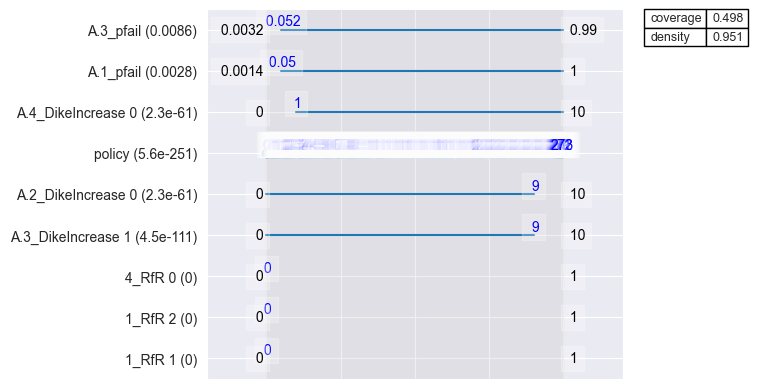

In [20]:
box_allcost.inspect()
box_allcost.inspect(style='graph')
plt.show()

In [22]:
# x = cleaned_experiments.reset_index(drop=True)
# # Boolean array van experimenten in de box
# in_box_allcost = box_allcost.yi  # Deze is altijd even lang als x na reset_index
#
# # Selecteer de experimenten die in de box vallen
# experiments_in_box_allcost = x.loc[in_box_allcost]
#
# # Unieke policies selecteren
# robust_policies_allcost = experiments_in_box_allcost['policy'].unique()
#
# # Robuuste policies opzoeken in originele experimenten
# robust_policies_df_allcost = experiments[experiments['policy'].isin(robust_policies_allcost)].drop_duplicates(subset='policy')
#
# # Toon resultaat
# print("Robust Policies for Expected annual damage:")
# display(robust_policies_df_allcost)

In [24]:
# # Stap 1: Extract de unieke policy-namen per outcome
# set_rfr = set(robust_policies_df_rfrtotalcost['policy'])
# set_damage = set(robust_policies_df_expanndamage['policy'])
# set_allcost = set(robust_policies_df_allcost['policy'])
#
# # Stap 2: Vind de intersectie (policies die in alle drie voorkomen)
# robust_policies_all = set_rfr & set_damage & set_allcost
#
# # Stap 3: Filter originele experimenten op deze policies
# robust_policies_df_all = experiments[experiments['policy'].isin(robust_policies_all)].drop_duplicates(subset='policy')
#
# # Stap 4: Toon resultaat
# print("Robust Policies for ALL outcomes (intersection of all PRIM analyses):")
# display(robust_policies_df_all)


In [25]:
# print(len(y_rfrtotalcost), len(y_dike_inv), len(y_expanndamage), len(cleaned_experiments))
#
# rfr_mask = box_rfrtotalcost.apply(cleaned_experiments)
# dike_mask = box_dike_inv.apply(cleaned_experiments)
# ead_mask = box_expanndamage.apply(cleaned_experiments)
#
# # 2. Combine the masks to find policies in ALL three boxes
# combined_mask = rfr_mask & dike_mask & ead_mask
#
# # 3. Extract those policies from the experiments
# best_policies = cleaned_experiments[combined_mask]
#
# # 4. (Optional) Show or save them
# import pandas as pd
# print(best_policies.head())

DIT KAN DENK IK WEG. HIER MOET DAN EIGEN TEKST MET UITLEG>

This figure shows the trade-off between coverage, density, and the number of restricted dimensions (i.e., a proxy for interpretability). Each dot corresponds to one candidate box. As an analyst, it is up to you to choose which box you want to inspect in more detail. Here you have to balance the three objectives. There is no hard rule that is used here. Note, however, that a density of lower than 0.5 means that less than half of the cases within the box of interest are of interest. So ideally, you start with higher density boxes. Moreover, you want boxes for which the box limits are statistically significant according to the quasi p-values. This means that the last box for a given number of restricted dimensions is also a good candidate box to inspect (here, for example, the last box with 2 dimensions and the last box with 3 dimensions).

This figure shows in gray the complete interval for each parameter. A blue line is used in the case of RealParameters to show the interval of the box identified by PRIM. For CategoricalParameters, a dot is used instead. The blue numbers give the specific limit. The numbers behind the y-labels indicate the quasi p-values. In the top right-hand corner, you can see the coverage and density of the identified box. So, what do we see in this case. First, both delta and stdev are not significant and should be ignored in the interpretation. This leaves b, q, and some of the policies as the key determinants. So, our top 10% worst performance for reliability occurs if b and q are low and for 6 out of the 10 policies. This covers 56% of the cases of interest, with a precision (i.e. density) of 80%. Now, you would go back to the model and try to understand why you get low reliability if b and q are low.

## 2. Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

In [26]:
from ema_workbench.analysis import dimensional_stacking

In [27]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(experiments, y_rfrtotalcost)
plt.show()

dimensional_stacking.create_pivot_plot(experiments, y_expanndamage)
plt.show()

NameError: name 'y_rfrtotalcost' is not defined

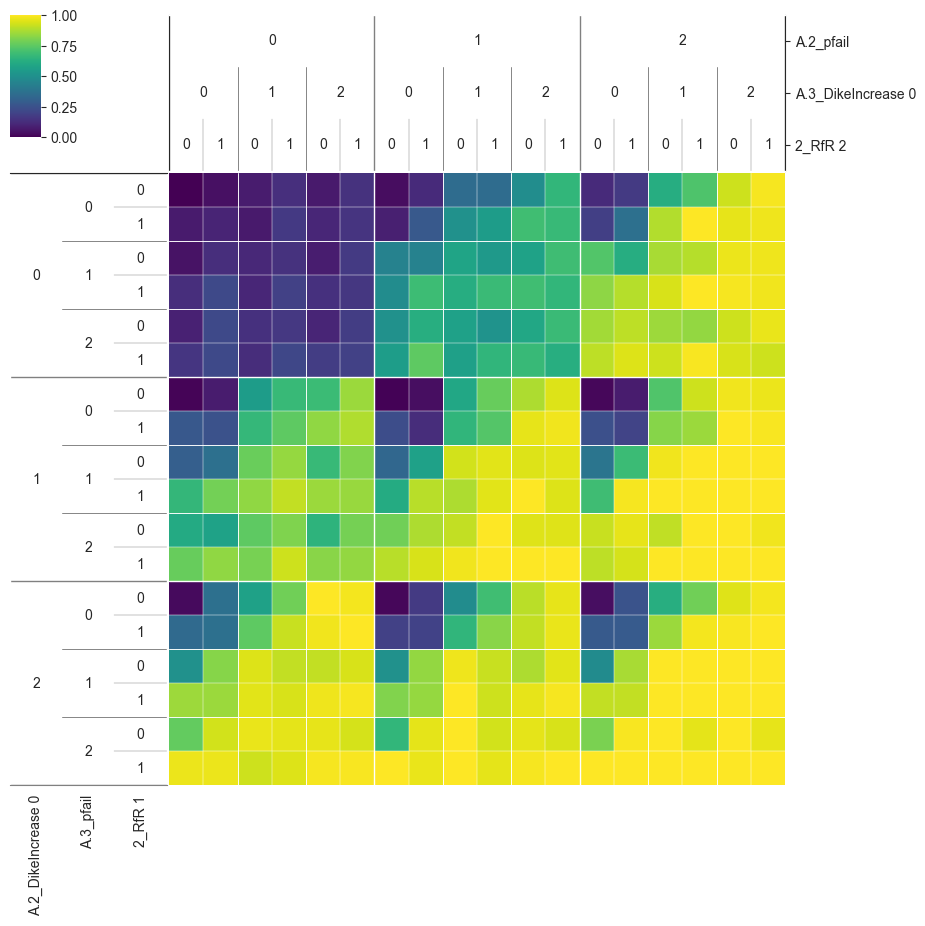

In [28]:
dimensional_stacking.create_pivot_plot(experiments,y_expanndamage)
plt.show()

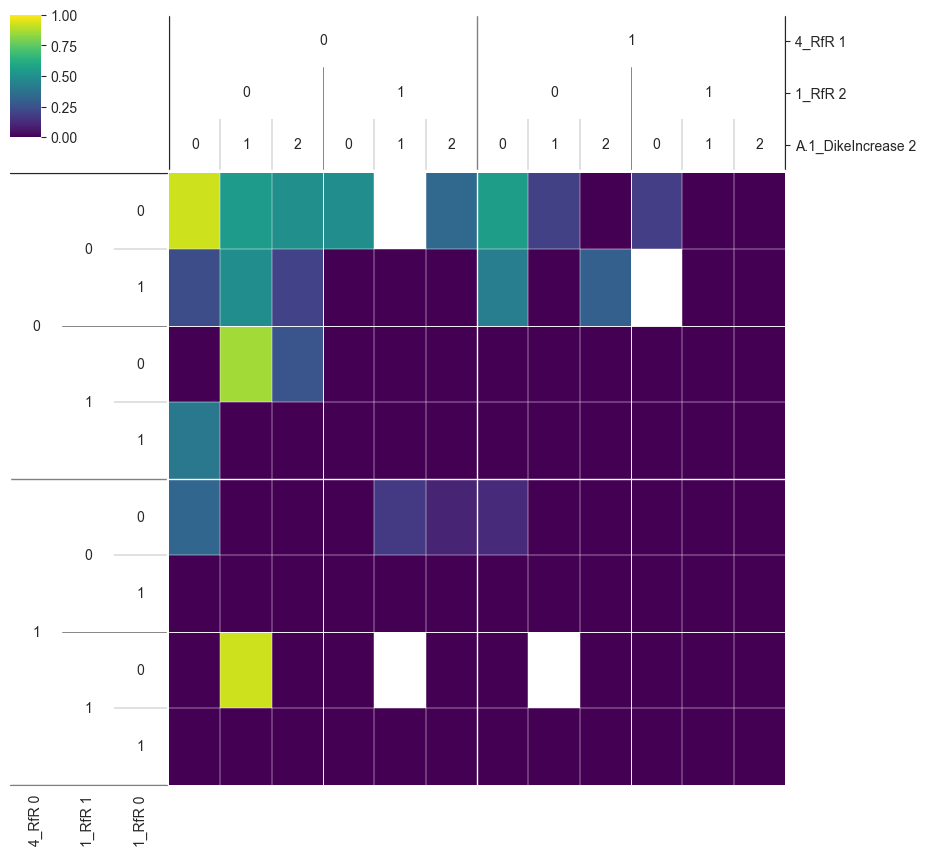

In [29]:
dimensional_stacking.create_pivot_plot(experiments,y_allcost)
plt.show()


DIT KAN WRS WEG. EIGEN TEKST HIER

As you can see, with the additional runs there are at least no white spaces left anymore. This is a good indication that we have a good coverage of the space.

#### Concluding remarks
In this notebook, we have applied several techniques for scenario discovery to the inter temporal version of the lake problem (i.e., the one with 100 decision variables). Both dimensional stacking and PRIM point to the importance of low values for the b and q parameters in driving low reliability. The last, qualitative, step is to go back to the model and offer a structural explanation (remember from system dynamics: structure explains behavior) for this behavior. So why do you get low reliability of b and q are low?